In [1]:
import pandas as pd
import numpy as np

from niapy.algorithms import Algorithm
from niapy.task import Task
from niapy.util.random import levy_flight

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn import datasets

import sys
import sklearn
import matplotlib
import keras


In [2]:
df = pd.read_csv('C:/Users/HP/Documents/Heart/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
df.shape

(1025, 14)

In [5]:
print("Number of Patients Data",df.shape[0])
print("Number of Labels",df.shape[1])
print("Number of Data",df.shape[0]*df.shape[1])

Number of Patients Data 1025
Number of Labels 14
Number of Data 14350


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
from IPython.display import Image

In [8]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data_duplicated=df.duplicated().any()          
print(data_duplicated)
data=df.drop_duplicates()
data.shape

True


(302, 14)

In [11]:
class SquirrelSearchAlgorithm(Algorithm):
    Name = ['SquirrelSearchAlgorithm', 'SSA']
    
    def __init__(self, population_size=10, food_sources=4, prob_predation=0.1, gliding_constant=1.9, scale=18, *args, **kwargs):
        super().__init__(population_size, *args, **kwargs)
        self.food_sources = food_sources
        self.prob_predation = prob_predation
        self.gliding_constant = gliding_constant
        self.scale = scale

    def set_parameters(self, population_size=10, food_sources=4, prob_predation=0.1, gliding_constant=1.9, scale=18, *args, **kwargs):
        super().set_parameters(population_size, *args, **kwargs)
        self.food_sources = food_sources
        self.prob_predation = prob_predation
        self.gliding_constant = gliding_constant
        self.scale = scale

    def get_parameters(self):
        params = super().get_parameters()
        params.update({
            'food_sources': self.food_sources,
            'prob_predation': self.prob_predation,
            'gliding_constant': self.gliding_constant,
            'scale': self.scale,
        })
        return params
    
    def gliding_distance(self):
        lift = 0.9783723933835806 / self.uniform(0.675, 1.5)
        drag = 1.630620655639301
        return 8.0 / (self.scale * drag / lift)
    
    def run_iteration(self, task, population, population_fitness, best_x, best_fitness, **params):
        indices = np.argsort(population_fitness)
        ht = indices[0]
        at = indices[1:self.food_sources]
        nt = indices[self.food_sources:]

        new_population = population.copy()

        for index in at:
            if self.random() >= self.prob_predation:
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[ht] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)
        
        nt = self.rng.permutation(nt)
        nt_1 = nt[:len(nt) // 2] # half go to acorn trees
        nt_2 = nt[len(nt) // 2:] # other half go to hickory trees
        
        for index in nt_1:
            if self.random() >= self.prob_predation:
                a = self.rng.choice(at)
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[a] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)

        for index in nt_2:
            if self.random() >= self.prob_predation:
                new_population[index] += self.gliding_distance() * self.gliding_constant * (population[ht] - population[index])
                new_population[index] = task.repair(new_population[index], rng=self.rng)
            else:
                new_population[index] = self.uniform(task.lower, task.upper)

        s_min = 1e-5 / (365 ** ((task.iters + 1) / (task.max_iters / 2.5)))
        sc = np.sqrt(np.sum((new_population[at] - new_population[ht]) ** 2))
        
      

        if sc < s_min:
            new_population[nt_1] = task.lower + levy_flight(size=(len(nt_1), task.dimension), rng=self.rng) * task.range
            new_population[nt_1] = task.repair(new_population[nt_1], rng=self.rng)

        new_fitness = np.apply_along_axis(task.eval, 1, new_population)
        best_x, best_fitness = self.get_best(new_population, new_fitness, best_x, best_fitness)
        print(best_fitness)
        return new_population, new_fitness, best_x, best_fitness, {}

if __name__ == '__main__':
    fit = []
    for i in range(10):
        task = Task('sphere', dimension=30, lower=-10, upper=10, max_iters=10)
        algo = SquirrelSearchAlgorithm()
        best_fitness = algo.run(task)
        
        #fit.append(best_fitness)
        #print("Best value")
        #print(fit.append(best_fitness))
        
    #print(f'Best: {np.min(fit)}')
        

339.65082262350796
188.6735766224333
166.0212223827296
146.43897786025155
140.05234976697076
138.22315925460055
123.31168644636108
98.85667443110873
98.85667443110873
96.6822474033199
258.2968979512698
105.72125773599006
105.72125773599006
77.3747159605046
66.51413834137762
58.90718298149835
52.31104171559896
50.981992641897726
50.47588638003059
37.760341994329224
313.9187018664493
224.63255471523306
150.60922420876673
132.1862291284236
95.24027513081195
95.24027513081195
92.85353053809793
92.06779704526501
82.53078617682537
77.60630181017493
400.42570746866613
162.03139870411903
84.08080974233653
71.92034859685346
64.26176133789265
62.08888285809441
60.24006039030008
60.07601861537647
60.01884965798765
59.96848847824307
404.2554743517075
186.77912143002155
150.22317763694343
116.39601191468942
97.6757145182057
96.27535717807865
95.77802195046746
80.04253949293651
80.04253949293651
77.50442471731269
352.7967527370762
136.6960211157477
108.78165674114702
99.00682003656199
99.00682003656

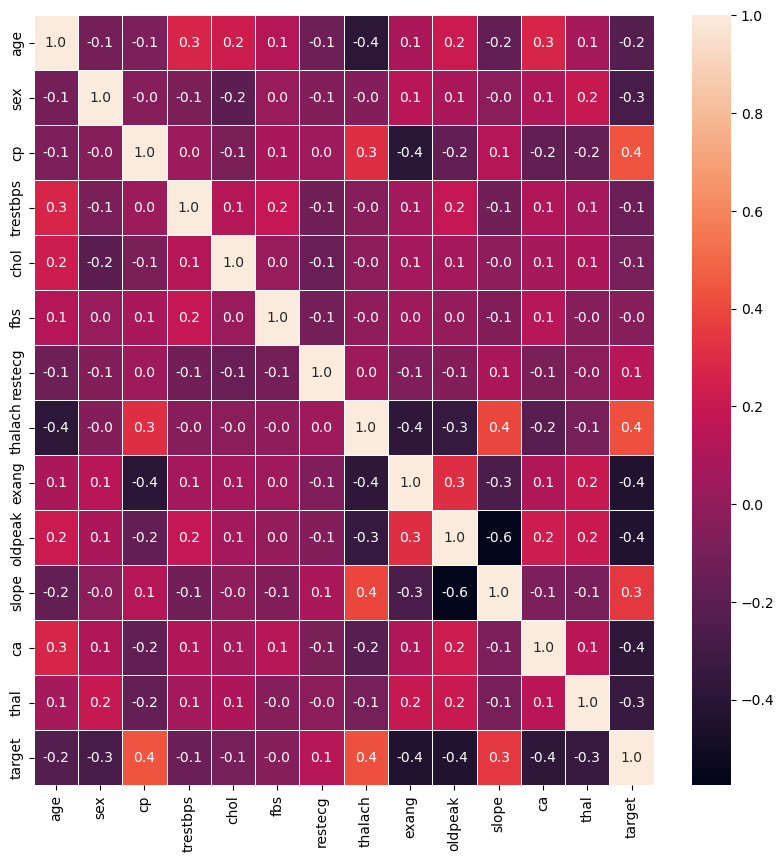

C:\Users\HP\AppData\Local\Temp\ipykernel_9880\3172890408.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1),df['target'],test_size=0.045, random_state=80)


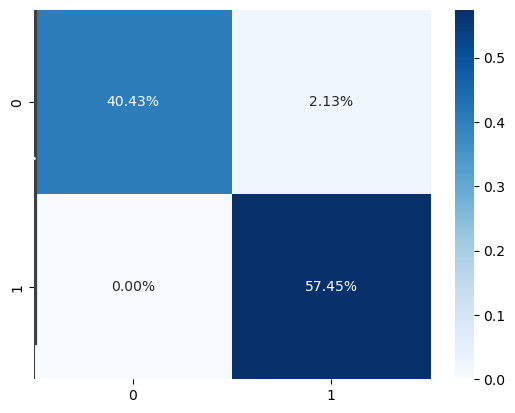

Accuracy is: 97.87234042553192


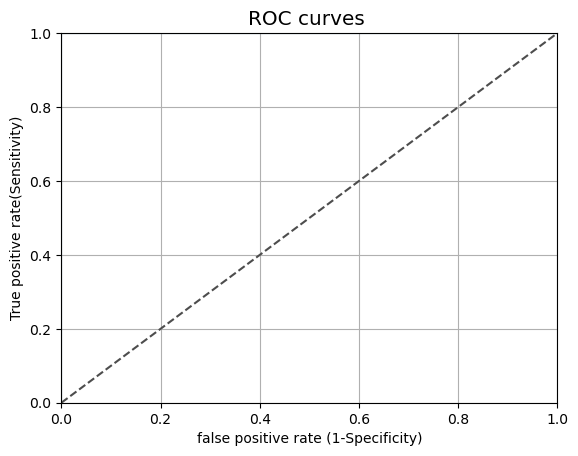

In [12]:
SquirrelSearchAlgorithm()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

sns.violinplot(y='trestbps',data=df)

sns.violinplot(y='chol',data=df)

sns.violinplot(y='oldpeak',data=df)

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1),df['target'],test_size=0.045, random_state=80)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac=accuracy_score(y_test,y_predict)
print('Accuracy is:', ac*100)

y_pred_quant = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1],transform=ax.transAxes, ls='--', c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] =12
plt.title('ROC curves ')
plt.xlabel('false positive rate (1-Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.grid(True)


In [13]:
auc(fpr,tpr)

1.0

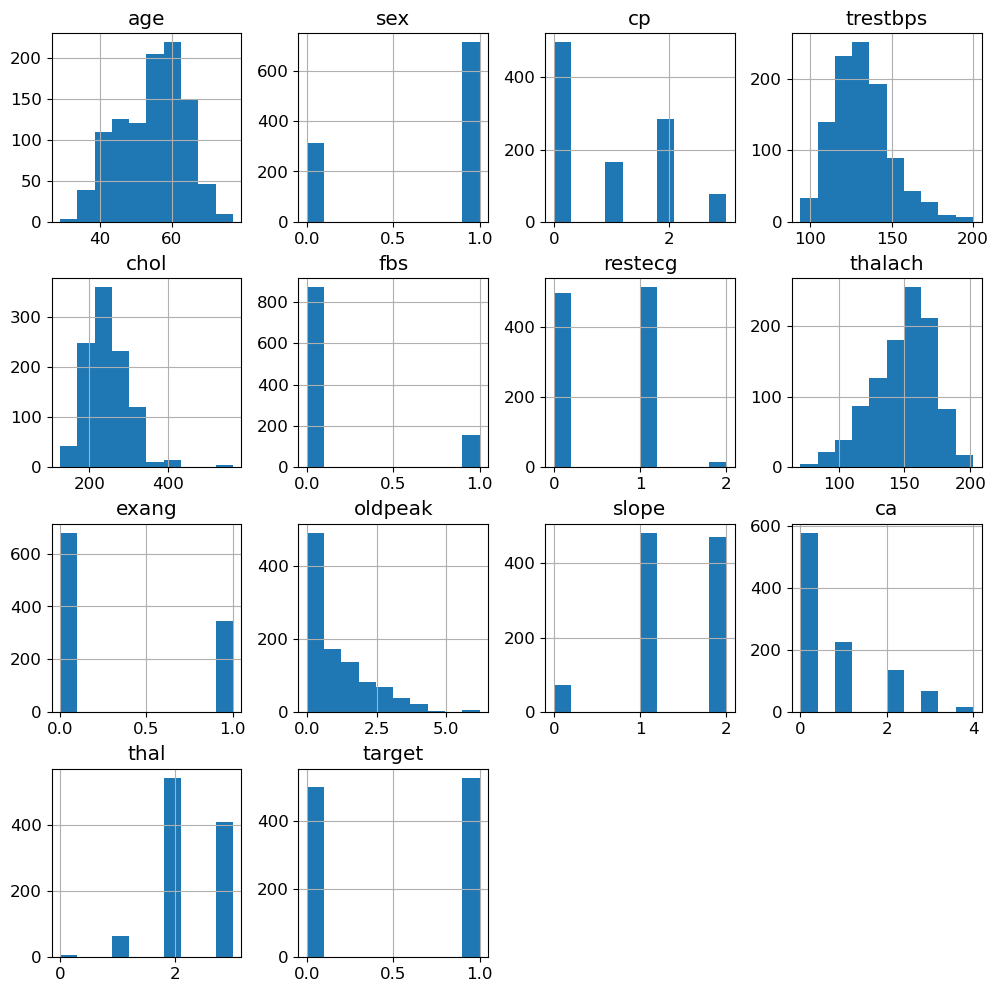

In [14]:
df.hist(figsize = (12, 12))
plt.show()

In [15]:
# create X and Y datasets for training
from sklearn import model_selection
from keras.utils.np_utils import to_categorical

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


C:\Users\HP\AppData\Local\Temp\ipykernel_9880\1080716221.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['target'], 1))


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0]


In [18]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5293
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5549
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5951
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6293
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6780
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7098
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7146
Epoch 8/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.7341
Epoch 9/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7305
Epoch 10/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7402
Epoch 11/

82/82 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8549
Epoch 84/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8354
Epoch 85/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3798 - accuracy: 0.8463
Epoch 86/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8451
Epoch 87/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8439
Epoch 88/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8390
Epoch 89/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8378
Epoch 90/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.8415
Epoch 91/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8415
Epoch 92/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8390
Epoch 93/100


In [20]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 5ms/step
Results for Categorical Model
0.43414634146341463
              precision    recall  f1-score   support

           0       0.43      0.99      0.60        89
           1       0.50      0.01      0.02       116

    accuracy                           0.43       205
   macro avg       0.47      0.50      0.31       205
weighted avg       0.47      0.43      0.27       205



In [21]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 3ms/step
Results for Binary Model
0.8439024390243902
              precision    recall  f1-score   support

           0       0.93      0.70      0.79        89
           1       0.80      0.96      0.87       116

    accuracy                           0.84       205
   macro avg       0.86      0.83      0.83       205
weighted avg       0.86      0.84      0.84       205

